# Shaking Table Data Import

## Import Data

### Libraries

In [1]:
import pydaq
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

### Information

In [2]:
# Test Information
directory = "free_field"
filenames = [
    "./"+directory+"/LE2402_T1.mat",
    "./"+directory+"/LE2402_T2.mat",
    "./"+directory+"/LE2402_T3.mat",
    "./"+directory+"/LE2402_T4.mat",
    "./"+directory+"/LE2402_T5.mat",
    "./"+directory+"/LE2402_T6.mat",
    "./"+directory+"/LE2402_T7.mat",
    "./"+directory+"/LE2402_T8.mat",
    "./"+directory+"/LE2402_T9.mat",
    "./"+directory+"/LE2402_T10.mat",
    "./"+directory+"/LE2402_T11.mat",
    "./"+directory+"/LE2402_T12.mat",
    "./"+directory+"/LE2402_T13.mat",
    "./"+directory+"/LE2402_T14.mat",
    "./"+directory+"/LE2402_T15.mat",
    "./"+directory+"/LE2402_T16.mat",
    "./"+directory+"/LE2402_T17.mat",
    "./"+directory+"/LE2402_T18.mat",
    "./"+directory+"/LE2402_T19.mat",
    "./"+directory+"/LE2402_T20.mat"
]
test_names = [
    "1-50Hz Noise, 0.06g",
    "1-50Hz Noise, 0.20g",
    "1-50Hz Noise, 0.06g",
    "1-50Hz Noise, 0.50g",
    "1-50Hz Noise, 0.06g",
    "1-50Hz Noise, 1.00g",
    "1-50Hz Noise, 0.06g",
    "Scaled seismic motion: Rec1",
    "Scaled seismic motion: Rec2",
    "Scaled seismic motion: Rec3",
    "Scaled seismic motion: Rec4",
    "Scaled seismic motion: Rec5",
    "Uncaled seismic motion: Rec1",
    "1-50Hz Noise, 0.06g",
    "1-50Hz Noise, 0.20g",
    "1-50Hz Noise, 0.06g",
    "1-50Hz Noise, 0.50g",
    "1-50Hz Noise, 0.06g",
    "1-50Hz Noise, 1.00g",
    "1-50Hz Noise, 0.06g"
]

In [3]:
# Channel information
channel_names = [
    "Acc1-R1",
    "Acc2-R1vert",
    "Acc3-R3",
    "Acc4-R5",
    "Acc5-R7",
    "Pot-R3",
    "Pot-R5",
    "Pot-R7",
    "Acc6-R1",
    "Acc7-R3",
    "Acc8-R3s",
    "Acc9-R5",
    "Acc10-R5s",
    "Acc11-R7",
    "Acc11-R5s",
]
channel_descriptions = [
    "Stack Ring 1Y",
    "Stack Ring 1Z",
    "Stack Ring 3Y",
    "Stack Ring 5Y",
    "Stack Ring 7Y",
    "Stack Ring 3Y",
    "Stack Ring 5Y",
    "Stack Ring 7Y",
    "Sand (510,0)",
    "Sand (510,242)",
    "Sand (300,242)",
    "Sand (510,462)",
    "Sand (300,462)",
    "Sand (510,682)",
    "Sand (300,682)",
]
units = [
    "g","g","g","g","g",
    "mm","mm","mm",
    "g","g","g","g","g","g","g"
]
calibrations = [
    1,1,1,1,1,
    0.039359,0.038985,0.038477,
    3.110,3.120,3.135,2.905,3.008,3.332,2.908
] #V/unit

### Data Import

In [4]:
# Create tests
test = [pydaq.Test() for _ in enumerate(filenames)]
for i,test_i in enumerate(test):
    test_i.read_equals(filename=filenames[i])
    test_i.set_test_info(name=test_names[i])
    test_i.set_channels_info(names=channel_names, descriptions=channel_descriptions, units=units, calibrations=calibrations)
    test_i.remove_offset()
    test_i.trim()

## Printing and plotting

[0.0000000e+00 1.9520000e-03 3.9040000e-03 ... 5.9670688e+01 5.9672640e+01
 5.9674592e+01]


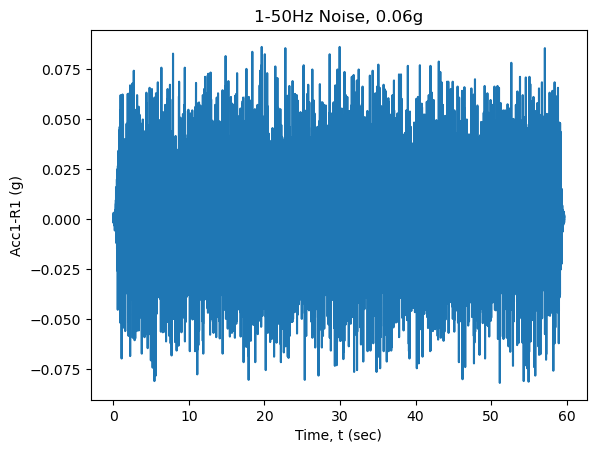

In [6]:
[x,y]=test[0].channel[0].timehistory()
print(x)
plt.plot(x,y)
plt.title(test[0].name)
plt.xlabel("Time, t (sec)")
plt.ylabel(test[0].channel[0].label())
plt.show()

In [7]:
x

array([0.0000000e+00, 1.9520000e-03, 3.9040000e-03, ..., 5.9670688e+01,
       5.9672640e+01, 5.9674592e+01])

In [8]:
np.flip(y)

array([1.29032198e-03, 1.29032198e-03, 6.95849780e-05, ...,
       9.85134978e-04, 6.95849780e-05, 1.59550698e-03])

Text(0, 0.5, 'Sand (300,682)')

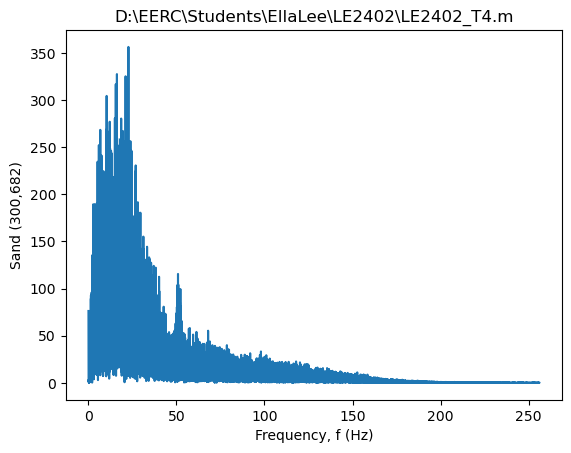

In [9]:
[x,y]=test[3].channel[14].fourier()
plt.plot(x,y)
plt.title(test[3].filename)
plt.xlabel("Frequency, f (Hz)")
plt.ylabel(test[3].channel[14].description)